In [1]:
import numpy as np
from scipy.sparse import diags, csc_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Question 1

In all parts below, the coefficient matrix $A$ is scaled by the factor $h^2$ in order to get rid of the $h^2$ in the denominator.

## Part a

In [2]:
A = np.zeros((15,15), dtype=int)

for i in range(15):
    
    A[i,i] = -4
    
    if i%5 == 0:
        
        A[i,i+1] = 2
        
    elif i%5 == 4:
        
        A[i,i-1] = 2
        
    else:
        
        A[i,i+1] = 1
        A[i,i-1] = 1      
    
    if i <= 9:
        
        A[i,i+5] = 1
            
    if i >= 5:
        
        A[i,i-5] = 1
    
print(A)

[[-4  2  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1 -4  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1 -4  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1 -4  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  2 -4  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0 -4  2  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  1 -4  1  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  1 -4  1  0  0  0  1  0  0]
 [ 0  0  0  1  0  0  0  1 -4  1  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  2 -4  0  0  0  0  1]
 [ 0  0  0  0  0  1  0  0  0  0 -4  2  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  1 -4  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  1 -4  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  1 -4  1]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  2 -4]]


## Part b

In [3]:
B = np.zeros((15,15), dtype=int)

for i in range(15):
    
    B[i,i] = -4
        
    if i <= 11:
        
        if i == 0 or i == 1 or i == 2:
        
            B[i,i+3] = 2
        
        else:
        
            B[i,i+3] = 1   
         
            
    if i>=3:
        
        if i == 12 or i == 13 or i == 14:
        
            B[i,i-3] = 2
        
        else:
        
            B[i,i-3] = 1
            
    if i%3 == 0:
        
        B[i,i+1] = 1
        
    elif i%3 == 1:
        
        B[i,i+1] = 1
        B[i,i-1] = 1
        
    elif i%3 == 2:
        
        B[i,i-1] = 1
    
print(B)

[[-4  1  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 -4  1  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 -4  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 -4  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  1 -4  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  1 -4  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 -4  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  1 -4  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  1 -4  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 -4  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  1 -4  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  1 -4  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  2  0  0 -4  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  1 -4  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  1 -4]]


## Part c

In [4]:
C = np.zeros((12,12), dtype=int)

for i in range(12):
    
    C[i,i] = -4
    
    if i%4 == 0:
        
        C[i,i+1] = 1
        C[i,i+3] = 1
        
    elif i%4 == 1 or i%4 == 2:
        
        C[i,i-1] = 1
        C[i,i+1] = 1

    elif i%4 == 3:
        
        C[i,i-1] = 1
        C[i,i-3] = 1
        
    
    if i <= 7:
        
        C[i,i+4] = 1
            
    if i >= 4:
        
        C[i,i-4] = 1
    
print(C)

[[-4  1  0  1  1  0  0  0  0  0  0  0]
 [ 1 -4  1  0  0  1  0  0  0  0  0  0]
 [ 0  1 -4  1  0  0  1  0  0  0  0  0]
 [ 1  0  1 -4  0  0  0  1  0  0  0  0]
 [ 1  0  0  0 -4  1  0  1  1  0  0  0]
 [ 0  1  0  0  1 -4  1  0  0  1  0  0]
 [ 0  0  1  0  0  1 -4  1  0  0  1  0]
 [ 0  0  0  1  1  0  1 -4  0  0  0  1]
 [ 0  0  0  0  1  0  0  0 -4  1  0  1]
 [ 0  0  0  0  0  1  0  0  1 -4  1  0]
 [ 0  0  0  0  0  0  1  0  0  1 -4  1]
 [ 0  0  0  0  0  0  0  1  1  0  1 -4]]


## Part d

In [5]:
D = np.zeros((12,12), dtype=int)

for i in range(12):
    
    D[i,i] = -4
    
    if i == 0 or i == 1 or i == 2:
        
        D[i,i+3] = 1
        D[i,i+9] = 1
        
        if i == 0:
            
            D[i,i+1] = 1
            
        if i == 1:
            
            D[i,i+1] = 1
            D[i,i+1] = 1
            
        if i == 2:
            
            D[i,i-1] = 1

            
    elif i == 9 or i == 10 or i == 11:
        
        D[i,i-3] = 1
        D[i,i-9] = 1
        
        if i == 9:
            
            D[i,i+1] = 1
            
        if i == 10:
            
            D[i,i+1] = 1
            D[i,i+1] = 1
            
        if i == 11:
            
            D[i,i-1] = 1
        
        
    else:
        
        D[i,i-3] = 1
        D[i,i+3] = 1
        
        if i%3 == 0:
            
            D[i,i+1] = 1
            
        elif i%3 == 1:
            
            D[i,i-1] = 1
            D[i,i+1] = 1
            
        elif i%3 == 2:
            
            D[i,i-1] = 1
        
print(D)

[[-4  1  0  1  0  0  0  0  0  1  0  0]
 [ 0 -4  1  0  1  0  0  0  0  0  1  0]
 [ 0  1 -4  0  0  1  0  0  0  0  0  1]
 [ 1  0  0 -4  1  0  1  0  0  0  0  0]
 [ 0  1  0  1 -4  1  0  1  0  0  0  0]
 [ 0  0  1  0  1 -4  0  0  1  0  0  0]
 [ 0  0  0  1  0  0 -4  1  0  1  0  0]
 [ 0  0  0  0  1  0  1 -4  1  0  1  0]
 [ 0  0  0  0  0  1  0  1 -4  0  0  1]
 [ 1  0  0  0  0  0  1  0  0 -4  1  0]
 [ 0  1  0  0  0  0  0  1  0  0 -4  1]
 [ 0  0  1  0  0  0  0  0  1  0  1 -4]]


## Part e

In [6]:
E = np.zeros((16,16), dtype=int)

for i in range(10):
    
    E[i,i] = -4
    
    if i <= 4:
        
        E[i,i+5] = 1
        
        
    if i >= 5:
        
        E[i,i-5] = 1
        
        if i >= 9:
            
            E[i,i+2] = 1
            
            
    if i == 0 or i == 5:
        
        E[i,i+2] = 1
        
    if i == 4 or i == 9:
        
        E[i,i-2] = 1
        
    else:
        
        E[i,i-2] = 1
        E[i,i+2] = 1

for i in range(10,16):
    
    E[i,i] = -4
    E[i,i-2] = 1
    
    if i+2 <= 15:
    
        E[i,i+2] = 1
        
    if i%2 == 0:
        
        E[i,i+1] = 1
        
        
    else:
    
        E[i,i-1] = 1
    
print(E)

[[-4  0  1  0  0  1  0  0  0  0  0  0  0  0  1  0]
 [ 0 -4  0  1  0  0  1  0  0  0  0  0  0  0  0  1]
 [ 1  0 -4  0  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0 -4  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0 -4  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  1  0 -4  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0 -4  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  0 -4  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0 -4  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  1  0 -4  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0 -4  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1 -4  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 -4  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1 -4  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0 -4  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  1 -4]]


# Question 2

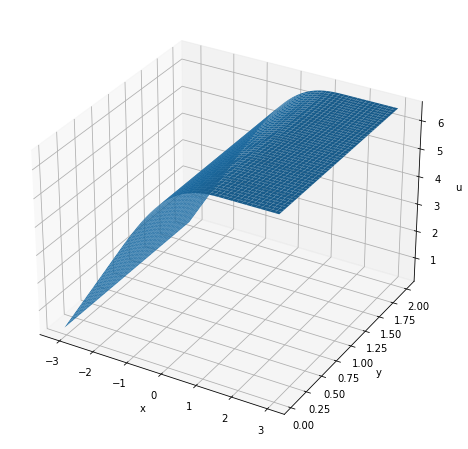

In [7]:
x_min = -np.pi  #Left endpoint of x interval
x_max = np.pi   #Right endpoint of x interval
y_min = 0       #Left endpoint of y interval
y_max = 2       #Right endpoint of y interval

nx = 50                                     # Number of grid points in x
ny = 50                                     # Number of grid points in y
dx = (x_max - x_min)/nx                     # Spacing in x direction
dy = (y_max - y_min)/ny                     # Spacing in y direction
n = nx*ny                                   # Dimension of system
x = np.linspace(x_min, x_max-dx, nx)        # Grid points in x-direction
y = np.linspace(y_min+dy, y_max, ny)        # Grid points in y-direction
xg, yg = np.meshgrid(x, y)   

# Create the diagonals
ones = np.full(n, 1)

a=np.ones(ny-1,dtype='float')
b=np.array([0.0],dtype='float')
c=np.concatenate((a,b),axis=0)
upper_diagonal = np.tile(c,nx)

d=np.ones(ny-2,dtype='float')
e=np.array([2.0,0.0],dtype='float')
f=np.concatenate((d,e),axis=0)
lower_diagonal = np.tile(f,nx)

# Create the offsets
offsets = [0, -1, 1, ny, -ny, (nx-1)*ny, -(nx-1)*ny]

# Create the sparse matrix
A = diags([-2*ones/dx**2 -2*ones/dy**2,lower_diagonal/dx**2,upper_diagonal/dx**2,ones/dy**2,ones/dy**2,ones/dy**2,ones/dy**2], offsets, shape=(n, n), dtype=float)

# Construct the RHS
b = np.zeros((ny,nx),dtype=float)
        
b1 = b.reshape(n,1)


for j in range(nx):
    
    if abs(x[j]) <= np.pi/2:    
            
        b[:,j] = -np.cos( x[j] )

#Solve the linear system using a sparse matrix solver
As = csc_matrix(A)
bs = csc_matrix(b1)
u = spsolve(As, bs).reshape(ny, nx)

#Plot the solution
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xg, yg, u)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
plt.show()